In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import folium
import os

import math
from scipy.spatial.distance import directed_hausdorff
from sklearn.cluster import DBSCAN

In [84]:
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [2]:
# path_dynamic = r'G:\AIS\Aohai\动态数据\202301-2\shipDynamicInfoData20230131.csv'
path_dynamic = r'D:\AIS\Aohai\动态数据\202301-2\shipDynamicInfoData20230131.csv'

In [21]:
df = pd.read_csv(path_dynamic, encoding='gbk', usecols=[0,2,7,8])

In [22]:
df['经度']=pd.to_numeric(df['经度'])
df['纬度']=pd.to_numeric(df['纬度'])

In [42]:
df_all = df.values[:,2:4].astype(np.float64)

In [30]:
ratio = 0.01
# df_geo = df.sample(int(len(df)*ratio))
dfv = df.sample(int(len(df)*ratio))

In [31]:
dfv = dfv.values[:,2:4]

In [32]:
dfv = dfv.astype(np.float)

In [35]:
dfv.shape

(97024, 2)

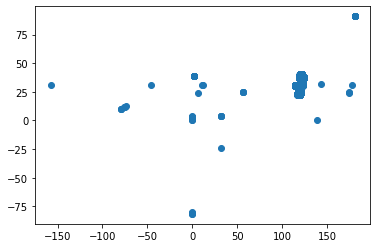

In [36]:
plt.scatter(dfv[:,0],dfv[:,1])

In [37]:
db = DBSCAN(eps=0.3, min_samples=10).fit(dfv)

In [46]:
cluster_lst = db.fit_predict(dfv)

In [47]:
dfv.shape

(97024, 2)

In [48]:
cluster_lst.shape

(97024,)

In [49]:
cluster_lst

array([0, 0, 0, ..., 2, 4, 0], dtype=int64)

In [82]:
# Utility Functions

color_lst = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_lst.extend(['firebrick', 'olive', 'indigo', 'khaki', 'teal', 'saddlebrown', 
                 'skyblue', 'coral', 'darkorange', 'lime', 'darkorchid', 'dimgray'])

def plot_cluster(traj_lst, cluster_lst):
    '''
    Plots given trajectories with a color that is specific for every trajectory's own cluster index.
    Outlier trajectories which are specified with -1 in `cluster_lst` are plotted dashed with black color
    '''
    cluster_count = np.max(cluster_lst) + 1
    
    for traj, cluster in zip(traj_lst, cluster_lst):
        
        if cluster == -1:
            # Means it it a noisy trajectory, paint it black
            plt.plot(traj[0], traj[1], "o",markerfacecolor='white',markeredgecolor="k",markersize=6)
        
        else:
            plt.plot(traj[0], traj[1], "o", markerfacecolor=color_lst[cluster % len(color_lst)],markeredgecolor="k",markersize=6)
    plt.grid()

In [83]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

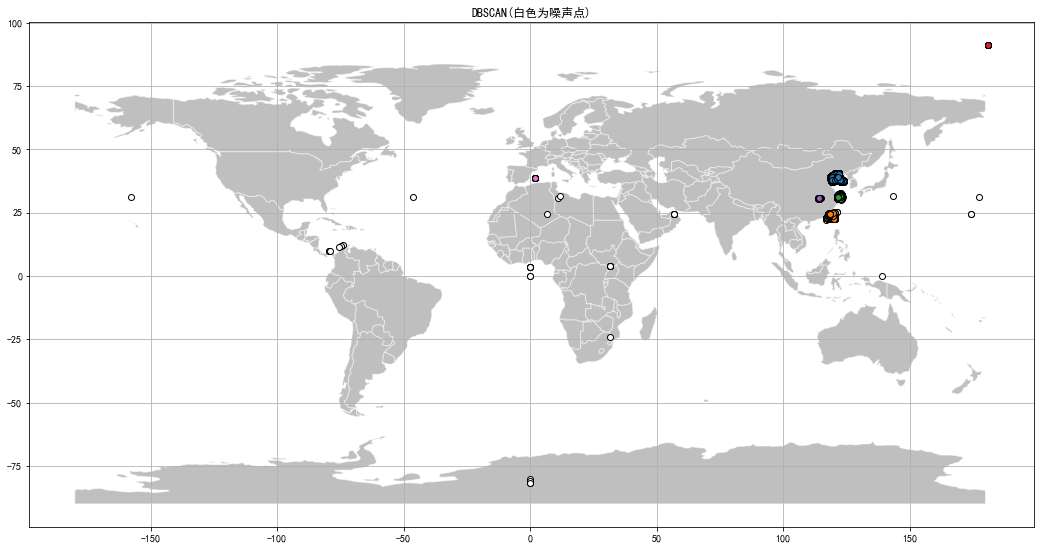

In [85]:
fig,ax = plt.subplots(figsize=(18,12))
df_world.plot(ax=ax,alpha=0.5,facecolor='grey',edgecolor='white')
plot_cluster(dfv,cluster_lst)
plt.title('DBSCAN(白色为噪声点)')
plt.savefig('DBSCAN_point.png',dpi=500,bbox_inches='tight')

In [ ]:
unique_labels = set(cluster_lst)

In [11]:
part_world = df_world.cx[60:155, 0:60]

<AxesSubplot:>

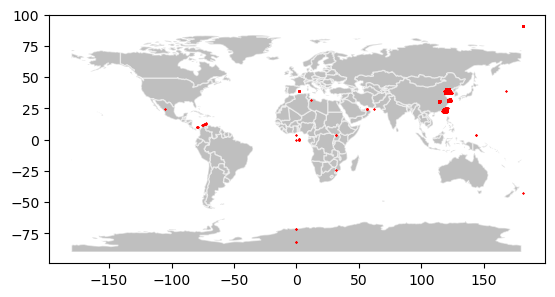

In [13]:
fig,ax = plt.subplots()
df_world.plot(ax=ax,alpha=0.5,facecolor='grey',edgecolor='white')
gdf.plot(ax=ax,color='red',marker='x',markersize=0.5)

In [26]:
df_values = df.values

In [27]:
df_values = df_values[:,2:4]

In [36]:
df_values = np.array(df_values).astype(np.float)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_28176\256781162.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  df_values = np.array(df_values).astype(np.float)


In [37]:
df_values

array([[120.41838333,  39.25005667],
       [120.2248    ,  38.775015  ],
       [118.19491667,  24.34925833],
       ...,
       [121.70654   ,  39.01184   ],
       [118.04863667,  24.41122667],
       [114.39455   ,  30.656905  ]])

In [40]:
df_values.shape

(97024, 2)

In [48]:
clustering = DBSCAN(eps=30, min_samples=5).fit(df_values[:6000])

(0.0, 60.0)

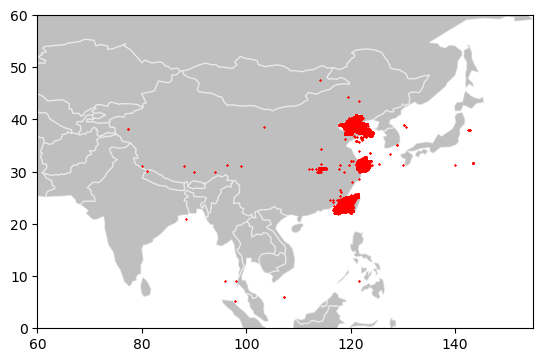

In [30]:
fig,ax = plt.subplots()
part_world.plot(ax=ax,alpha=0.5,facecolor='grey',edgecolor='white')
gdf.plot(ax=ax,color='red',marker='x',markersize=0.5)
ax.set_xlim([60,155])
ax.set_ylim([0,60])

In [12]:
df_clear

,时间,船舶MMSI,经度,纬度
0,2023-01-30 23:59:59,413376990,122.304143,31.102057
1,2023-01-31 00:00:00,414574000,120.617920,38.629153
2,2023-01-31 00:00:00,413324940,119.639500,37.800067
3,2023-01-31 00:00:00,525125006,121.019968,38.483102
4,2023-01-31 00:00:00,413436370,121.958908,38.825000
...,...,...,...,...
9702408,2023-01-31 23:59:59,414532000,120.981155,38.516518
9702409,2023-01-31 23:59:59,414532000,120.981155,38.516518
9702410,2023-01-31 23:59:59,412472110,118.165203,24.220033
9702411,2023-01-31 23:59:59,202106001,118.237143,24.360085
